# 引导区

In [1]:
library(ggplot2)
library(plyr)
library(maptools)

Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


# 数据准备区

In [2]:
setwd("F:/Github/12306_map/map_data") #确定文件路径

china_map <-readShapePoly("bou2_4p.shp") # 读取地图空间数据
china_map <- fortify(china_map) #转化为数据框
station_data<-read.csv("chinaprovincecity.csv") #读取省会城市坐标
map_data<-read.csv("group_province_map2.csv")
# china_map<-merge(china_map, map_data, by.x = "group", by.y = "group") #过滤掉不需要的省份

Warning message:
"use rgdal::readOGR or sf::st_read"Regions defined for each Polygons


# 函数区

In [3]:
map_plot <- function(map_data) {
   ggplot()+
    geom_polygon(data=map_data, aes(x=long, y=lat, group=group),fill="grey95", colour="grey60",size=0.25)+ #中国地图
    # geom_point(data=station_data, aes(x = jd,y = wd),size=4,fill="black", alpha=1,shape=21, colour="white")+ #散点图
    #geom_segment(data=dataF,aes(x=soux,y=souy,xend=tagx,yend=tagy,colour="black"),colour="black")+ 在地图上绘制线段
    #geom_text(data=guangdong_station,aes(x = longitude,y = latitude,label = station), vjust = 0, colour = 'black', size = 1)+ 添加文本
    # geom_text(data=station_data,aes(x = jd,y = wd,label = province), size = 3, vjust = 2)+
    coord_map("polyconic") #将地图变成球状展示，不加则是直角单元格，coord系列函数是ggplot2中的坐标系设置函数
}

# 数据处理及变换区

# 绘图区

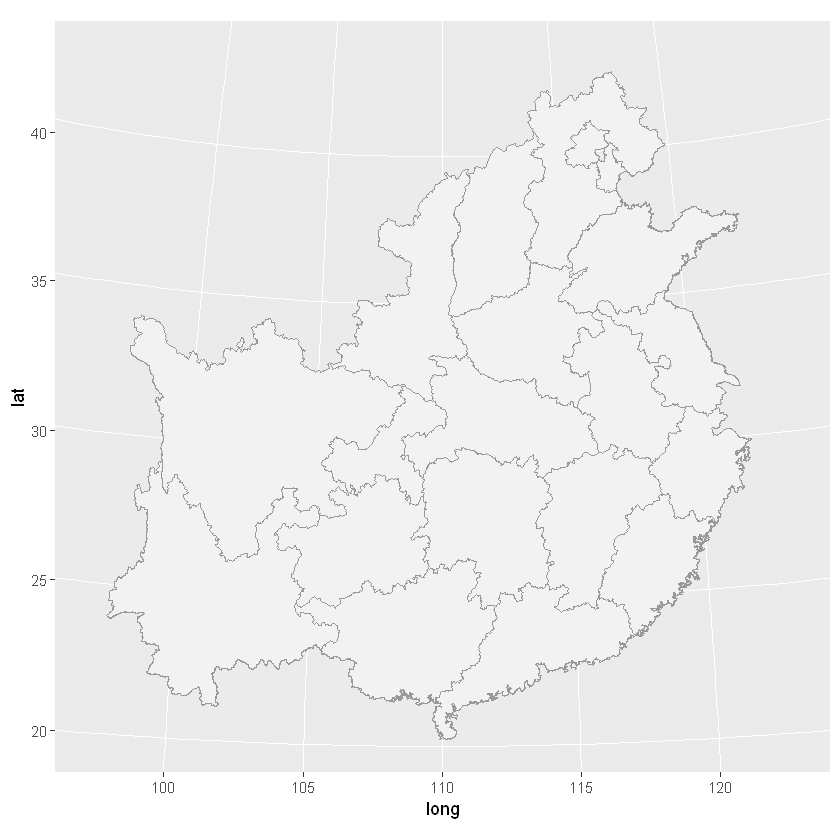

In [4]:
#输入数据：从china_map中挑选出指定省份
map_plot(china_map[china_map$group %in% c(map_data$group),])